In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=242848854833581b56787f1ca58dd1ad


In [7]:
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | bengbu
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | locri
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | y

Processing Record 39 of Set 4 | turinskaya sloboda
Processing Record 40 of Set 4 | green river
Processing Record 41 of Set 4 | staraya toropa
Processing Record 42 of Set 4 | samusu
City not found. Skipping...
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | agde
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | fukue
Processing Record 47 of Set 4 | xichang
Processing Record 48 of Set 4 | ossora
Processing Record 49 of Set 4 | adre
Processing Record 50 of Set 4 | sambava
Processing Record 1 of Set 5 | kulhudhuffushi
Processing Record 2 of Set 5 | mwinilunga
Processing Record 3 of Set 5 | maniitsoq
Processing Record 4 of Set 5 | kankipadu
Processing Record 5 of Set 5 | solginskiy
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | burns lake
Processing Record 8 of Set 5 | asau
Processing Record 9 of Set 5 | egvekinot
Processing Record 10 of Set 5 | salinopolis
Processing Record 11 of Set 5 | changji
Processing Record 12

Processing Record 24 of Set 8 | paragominas
Processing Record 25 of Set 8 | cuddapah
Processing Record 26 of Set 8 | belaya gora
Processing Record 27 of Set 8 | apucarana
Processing Record 28 of Set 8 | wewak
Processing Record 29 of Set 8 | mar del plata
Processing Record 30 of Set 8 | linxia
Processing Record 31 of Set 8 | saint-georges
Processing Record 32 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 8 | tsaratanana
Processing Record 34 of Set 8 | muros
Processing Record 35 of Set 8 | kashi
Processing Record 36 of Set 8 | calabozo
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | ust-nera
Processing Record 39 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 40 of Set 8 | rosetta
Processing Record 41 of Set 8 | beringovskiy
Processing Record 42 of Set 8 | mamallapuram
Processing Record 43 of Set 8 | shaoyang
Processing Record 44 of Set 8 | tigzirt
Processing Record 45 of Set 8 | chapais
Processing Record 46 of Set 

Processing Record 11 of Set 12 | chongwe
Processing Record 12 of Set 12 | gannan
Processing Record 13 of Set 12 | asilah
Processing Record 14 of Set 12 | labuhan
Processing Record 15 of Set 12 | inhambane
Processing Record 16 of Set 12 | odweyne
Processing Record 17 of Set 12 | takhtamygda
Processing Record 18 of Set 12 | gorur
Processing Record 19 of Set 12 | san ignacio
Processing Record 20 of Set 12 | mandalgovi
Processing Record 21 of Set 12 | kisanga
Processing Record 22 of Set 12 | santiago del estero
Processing Record 23 of Set 12 | morondava
Processing Record 24 of Set 12 | talnakh
Processing Record 25 of Set 12 | tangier
Processing Record 26 of Set 12 | nanakuli
Processing Record 27 of Set 12 | roberval
Processing Record 28 of Set 12 | kefalovrison
City not found. Skipping...
Processing Record 29 of Set 12 | havelock
Processing Record 30 of Set 12 | baeza
Processing Record 31 of Set 12 | lodwar
Processing Record 32 of Set 12 | nyurba
Processing Record 33 of Set 12 | marsh harb

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.04,68,2,13.11,AU,2021-06-15 02:20:47
1,Ushuaia,-54.8000,-68.3000,37.06,81,20,18.41,AR,2021-06-15 02:20:47
2,Punta Arenas,-53.1500,-70.9167,30.31,80,0,8.05,CL,2021-06-15 02:20:48
3,Bredasdorp,-34.5322,20.0403,54.72,94,38,5.75,ZA,2021-06-15 02:20:48
4,Vaini,-21.2000,-175.2000,77.16,88,75,9.22,TO,2021-06-15 02:20:48
5,Souillac,-20.5167,57.5167,70.36,94,20,8.05,MU,2021-06-15 02:20:49
6,Mataura,-46.1927,168.8643,50.49,99,100,1.05,NZ,2021-06-15 02:20:49
7,Georgetown,5.4112,100.3354,87.73,76,20,4.61,MY,2021-06-15 02:20:49
8,Bambous Virieux,-20.3428,57.7575,70.21,94,20,8.05,MU,2021-06-15 02:20:50
9,Bengbu,32.9408,117.3608,83.44,78,97,8.12,CN,2021-06-15 02:20:50


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-06-15 02:20:47,-33.6500,115.3333,59.04,68,2,13.11
1,Ushuaia,AR,2021-06-15 02:20:47,-54.8000,-68.3000,37.06,81,20,18.41
2,Punta Arenas,CL,2021-06-15 02:20:48,-53.1500,-70.9167,30.31,80,0,8.05
3,Bredasdorp,ZA,2021-06-15 02:20:48,-34.5322,20.0403,54.72,94,38,5.75
4,Vaini,TO,2021-06-15 02:20:48,-21.2000,-175.2000,77.16,88,75,9.22
...,...,...,...,...,...,...,...,...,...
561,Floro,NO,2021-06-15 02:24:09,61.5996,5.0328,50.23,93,90,13.80
562,Rocha,UY,2021-06-15 02:24:10,-34.4833,-54.3333,53.62,78,100,11.63
563,Yenagoa,NG,2021-06-15 02:24:10,4.9247,6.2642,75.69,96,92,3.76
564,Tashara,RU,2021-06-15 02:24:11,55.5195,83.5094,65.23,61,24,6.67


In [13]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


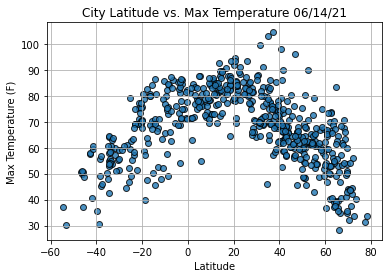

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

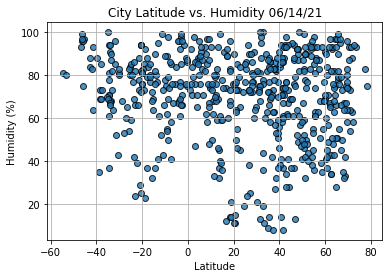

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

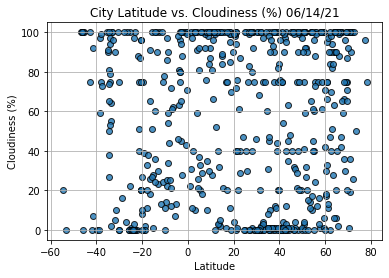

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

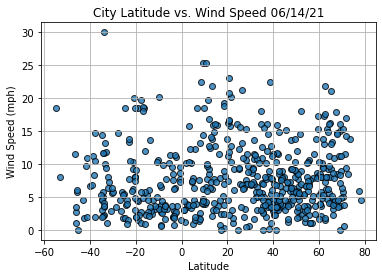

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13


City                       Avarua
Country                        CK
Date          2021-06-15 02:20:53
Lat                      -21.2078
Lng                      -159.775
Max Temp                    75.25
Humidity                       78
Cloudiness                     40
Wind Speed                  10.36
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Georgetown,MY,2021-06-15 02:20:49,5.4112,100.3354,87.73,76,20,4.61
9,Bengbu,CN,2021-06-15 02:20:50,32.9408,117.3608,83.44,78,97,8.12
10,Thompson,CA,2021-06-15 02:20:50,55.7435,-97.8558,62.76,63,75,2.30
11,Cabo San Lucas,MX,2021-06-15 02:20:51,22.8909,-109.9124,88.52,65,40,9.22
12,Locri,IT,2021-06-15 02:20:52,38.2414,16.2623,73.98,86,12,3.69


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

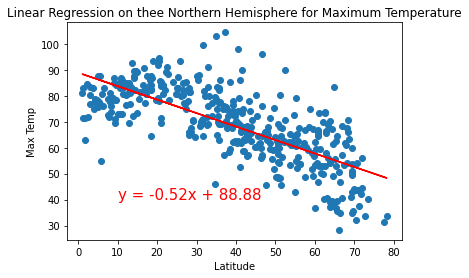

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title(f"Linear Regression on thee Northern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



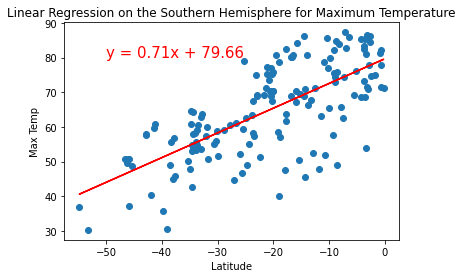

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

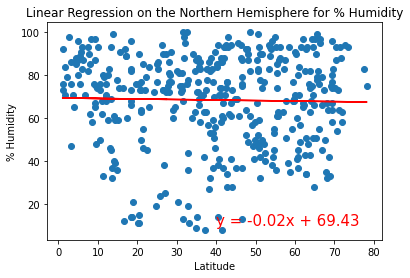

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

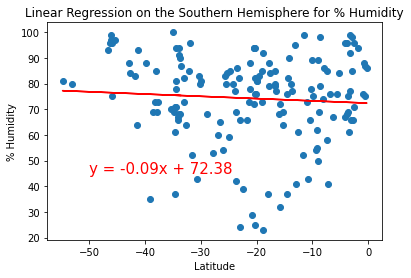

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,45))

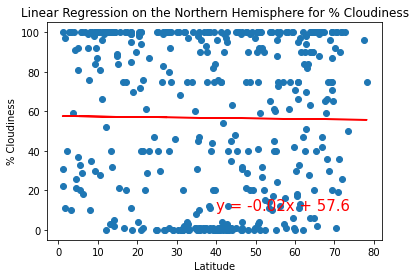

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

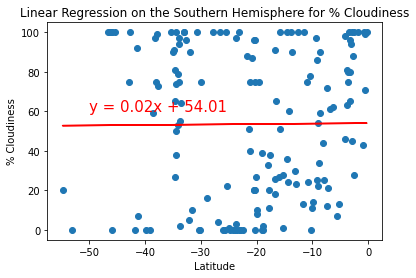

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

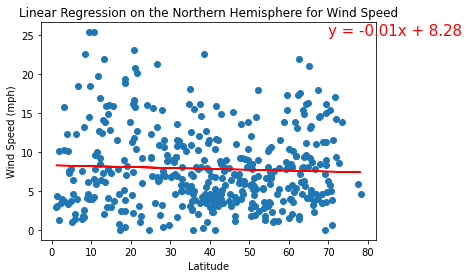

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(70,25))

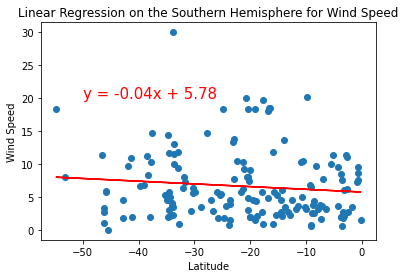

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
